<a href="https://colab.research.google.com/github/lucyzandile/unsupervised-predict-streamlit-template/blob/master/Kaggle_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


## Problem Statement

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## Importing packages

In [ ]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import rc

import seaborn as sns

from statsmodels.graphics.correlation import plot_corr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id="two"></a>
## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing datasets

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

test = pd.read_csv("/content/drive/MyDrive/test.csv")

#df_gscores = pd.read_csv("genome_scores.csv")

#df_gtags = pd.read_csv("genome_tags.csv")

#df_imdb = pd.read_csv("imdb_data.csv")

#df_links = pd.read_csv("links.csv")

#df_movies = pd.read_csv("https://raw.githubusercontent.com/lucyzandile/unsupervised-predict-streamlit-template/master/resources/data/movies.csv")

#df_tags = pd.read_csv("tags.csv")

### Overview of the datasets

In [ ]:
#Checking df_train dataset head
display(train.head())

#Checking df_train dataset information
train.info()

#Checking for null values
display(train.isnull().sum())

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
#Checking df_test dataset head
#display(test.head())

#Checking df_test dataset information
#test.info()

#Checking for null values
#display(test.isnull().sum())

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


userId     0
movieId    0
dtype: int64

In [ ]:
#Checking df_gscores dataset head
#display(df_gscores.head())

#Checking df_gscores dataset information
#df_gscores.info()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [ ]:
#Checking df_gtags dataset head
#display(df_gtags.head())

#Checking df_gtags dataset information
#df_gtags.info()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
#Checking df_imdb dataset head
#display(df_imdb.head())

#Checking df_imdb dataset information
#df_imdb.info()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
#Checking df_links dataset head
#display(df_links.head())

#Checking df_links dataset information
#df_links.info()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
#Checking df_movies dataset head
display(df_movies.head())

#Checking df_movies dataset information
df_movies.info()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
#Checking df_tags dataset head
#display(df_tags.head())

#Checking df_tags dataset information
#df_tags.info()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


<a id="three"></a>
## Data Preprocessing

In [ ]:
# Create a copy of the train data

train_copy = train.copy()

df_train = train_copy

In [ ]:
 #Create a copy of the train data

test_copy = test.copy()

df_test = test_copy

### Merging datasets

In [ ]:
# Merge the df_train and df_movies
df_merge = df_train.merge(df_movies, on='movieId')

#Checking df_merge dataset head
display(df_merge.head())

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


<a id="four"></a>
## Data Preprocessing

In [ ]:
df_merge.groupby('title')['rating'].mean().sort_values(ascending = False)

title
American Ninja 3: Blood Hunt (1989)                  5.0
Thief of Bagdad, The (1924)                          5.0
Dark Days (2000)                                     5.0
Armour of God (Long xiong hu di) (1987)              5.0
The Last Brickmaker in America (2001)                5.0
                                                    ... 
Hip Hop Witch, Da (2000)                             0.5
Paul Blart: Mall Cop (2009)                          0.5
Behind the Mask: The Rise of Leslie Vernon (2006)    0.5
Trespass (2011)                                      0.5
Peter & the Wolf (2006)                              0.5
Name: rating, Length: 8860, dtype: float64

In [ ]:
df_merge.groupby('title')['rating'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                           341
Pulp Fiction (1994)                           324
Shawshank Redemption, The (1994)              311
Silence of the Lambs, The (1991)              304
Star Wars: Episode IV - A New Hope (1977)     291
                                             ... 
Lightning in a Bottle (2004)                    1
Light Years (Gandahar) (1988)                   1
Light Sleeper (1992)                            1
Lifeguard, The (2013)                           1
Last Metro, The (Dernier métro, Le) (1980)      1
Name: rating, Length: 8860, dtype: int64

### Visualizing ratings

In [ ]:
#Create a DataFrame and add the number of ratings to is using a count method
ratings_mean = pd.DataFrame(df_merge.groupby('title')['rating'].mean())
ratings_mean['# of ratings'] = df_merge.groupby('title')['rating'].count()
ratings_mean.head()

,rating,# of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


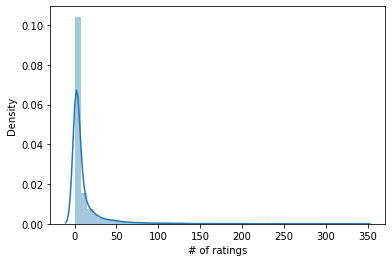

In [ ]:
sns.distplot(ratings_mean['# of ratings'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


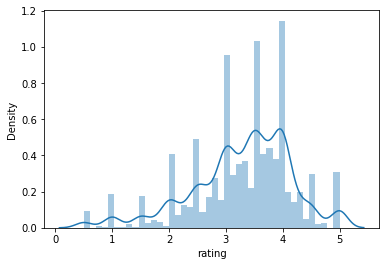

In [ ]:
sns.distplot(ratings_mean['rating'])

#### The Relationship Between Average Rating and Number of Ratings

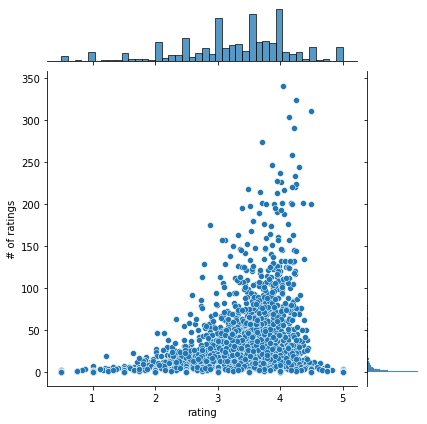

In [ ]:
sns.jointplot(x = ratings_mean['rating'], y = ratings_mean['# of ratings'])

#### Recommender system

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623222 sha256=3b810a21a0f95a3518e4843f0ad9b7ecf18c2b1b812e3445048c94e3e6154811
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(1, 5))

In [ ]:
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
svd = SVD(verbose=True, n_epochs=30, random_state=42)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=15, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20


{'fit_time': (1011.874564409256,
  1116.1942689418793,
  1081.1658155918121,
  1071.6707544326782,
  1086.3795142173767,
  1090.7622935771942,
  1092.9576017856598,
  1098.5301291942596,
  1071.9100835323334,
  1085.2599532604218,
  1063.2408320903778,
  1060.547235250473,
  1074.6740980148315,
  1107.1402695178986,
  1100.4352276325226),
 'test_mae': array([0.62383709, 0.62399391, 0.62451014, 0.6246049 , 0.62627525,
        0.62618896, 0.62529299, 0.6261775 , 0.62458656, 0.62535278,
        0.62594601, 0.62384819, 0.62489395, 0.62508926, 0.62500611]),
 'test_rmse': array([0.82386021, 0.82397704, 0.82529145, 0.82590623, 0.82769462,
        0.82711518, 0.82581475, 0.82697015, 0.82520086, 0.8260402 ,
        0.82665944, 0.8242203 , 0.82577908, 0.82562523, 0.82544308]),
 'test_time': (23.972339391708374,
  35.91921257972717,
  34.09085488319397,
  29.49803066253662,
  34.24764132499695,
  33.48869204521179,
  28.545862674713135,
  29.253288745880127,
  30.35012125968933,
  35.000718593597

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


In [ ]:
ratings=[]
for x,y in df_test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,2.989950
1,1_4144,4.047662
2,1_5767,3.525101
3,1_6711,4.009411
4,1_7318,2.755310


In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"ID":output_df['ID'],"rating": output_df['est']})
results.to_csv("Team15.csv", index=False)